### How reliable is your data?

Measuring tree diamenter at breast height (DBH) is a standard ecological measurement.

Díaz, S., Kattge, J., Cornelissen, J. et al. The global spectrum of plant form and function. Nature 529, 167–171 (2016). https://doi.org/10.1038/nature16489
    
    
    


### Method. 
https://www.youtube.com/watch?v=JLc4UjOpC0s

Using a tape measure or string measure round each tree in the two lines of trees outside Ashworth.  
Note whether each tree is a sycamore (lobed leaves) or a beech (smooth leaves)  
https://www.woodlandtrust.org.uk/trees-woods-and-wildlife/british-trees/

Once all the trees have been measured by one person in the group, go round again with a second person measuring.   

### Data Entry. 
Make a python dataframe for your data from lists of tree number, row, species, measurer

In [67]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [32]:
Tree = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
Row = [1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2]
Species = ['s','s','s','s','s','b','b','b','b','b','s','s','s','s','s','b','b','b','b','b']
P_DBH = [161,139,148,174,107,217,210,219,418,238,134,145,167,122,123,243,256,212,180,190]
C_DBH = [162,142,147,175,107,200,206,220,272,233,134,153,166,123,130,256,220,215,178,185]

In [52]:
zipped = list(zip(Tree, Row, Species, P_DBH,C_DBH))
df = pd.DataFrame(zipped, columns=['Tree','Row', 'Species', 'P_DBH','C_DBH'])

#### Check things look right

In [41]:
df.shape

(20, 5)

In [42]:
df.head(3)

,Tree,Row,Species,P_DBH,C_DBH
0,1,1,s,161,162
1,2,1,s,139,142
2,3,1,s,148,147


In [43]:
df.describe()

,Tree,Row,P_DBH,C_DBH
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,1.500000,190.150000,181.200000
std,5.91608,0.512989,69.267046,45.625016
min,1.00000,1.000000,107.000000,107.000000
25%,5.75000,1.000000,143.500000,145.750000
50%,10.50000,1.500000,177.000000,176.500000
75%,15.25000,2.000000,217.500000,216.250000
max,20.00000,2.000000,418.000000,272.000000


### Do we have reliable measures?

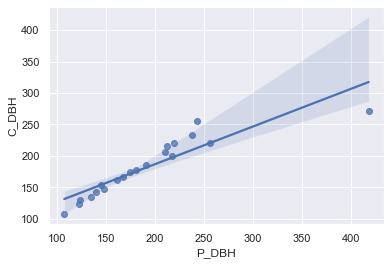

In [49]:
ax = sns.regplot(x="P_DBH", y="C_DBH", data=df)

We will exclude the outlier (low crown)

In [53]:
df = df[df.P_DBH < 400]

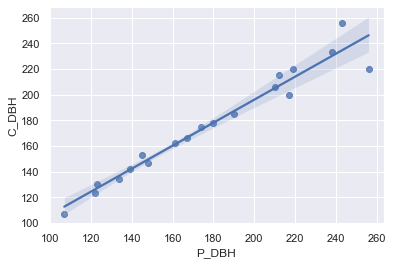

In [54]:
ax = sns.regplot(x="P_DBH", y="C_DBH", data=df)

Better!  
More variation on larger trees. 

#### Average the two measurements

In [58]:
df['Av_DBH'] = df[['C_DBH','P_DBH']].mean(axis=1)

In [59]:
df.head(3)

,Tree,Row,Species,P_DBH,C_DBH,Av_DBH
0,1,1,Acer_pseudoplatanus,161,162,161.5
1,2,1,Acer_pseudoplatanus,139,142,140.5
2,3,1,Acer_pseudoplatanus,148,147,147.5


### Are the species different?

Give species names not letters

In [60]:
df['Species'] = df['Species'].replace({'s':'Acer_pseudoplatanus', 'b':'Fagus_sylvatica'})

In [61]:
df.groupby('Species').mean()

,Tree,Row,P_DBH,C_DBH,Av_DBH
Species,,,,,
Acer_pseudoplatanus,8.000000,1.500000,142.000000,143.900000,142.950000
Fagus_sylvatica,13.444444,1.555556,218.333333,212.555556,215.444444


<AxesSubplot:xlabel='Species', ylabel='Av_DBH'>

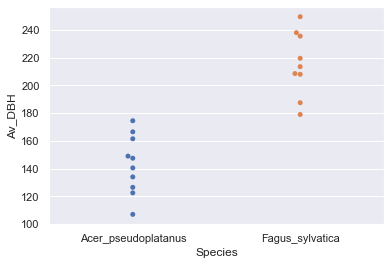

In [63]:
sns.swarmplot(x="Species", y="Av_DBH", data=df)

### T-test

In [68]:
stats.ttest_ind(df['Av_DBH'][df['Species'] == 'Acer_pseudoplatanus'],
                df['Av_DBH'][df['Species'] == 'Fagus_sylvatica'])

Ttest_indResult(statistic=-7.1309619006666205, pvalue=1.6834757981392824e-06)

### Are the rows different?

In [64]:
df.groupby('Row').mean()

,Tree,P_DBH,C_DBH,Av_DBH
Row,,,,
1,5.111111,179.222222,176.888889,178.055556
2,15.500000,177.200000,176.000000,176.600000


<AxesSubplot:xlabel='Row', ylabel='Av_DBH'>

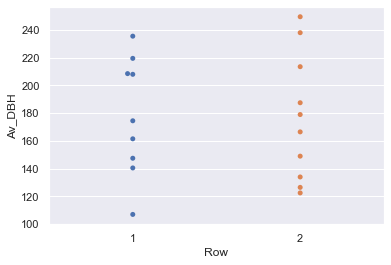

In [65]:
sns.swarmplot(x="Row", y="Av_DBH", data=df)


In [69]:
stats.ttest_ind(df['Av_DBH'][df['Row'] == 1],
                df['Av_DBH'][df['Row'] == 2])

Ttest_indResult(statistic=0.07167791278239664, pvalue=0.9436947593843594)